## zadanie 5
### część 1

In [1]:
import numpy as np, matplotlib.pyplot as plt

In [26]:
def oblicz_regresje(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    b0 = y_mean - b1 * x_mean
    return b0, b1

In [44]:
N1 = 100
N2 = 1000
sigmas = [0.1, 0.5,0.9, 1.1, 1.5, 2, 3]
mc = 500

In [40]:
def punkt_zmiany(n, l, sigma):
    dane1 = np.random.normal(0, sigma**2, size = int(l*n))
    dane2 = np.random.normal(0, 1, size = int((1-l)*n))
    dane = np.concatenate([dane1, dane2])
    potencjalne_k = range(2, n-1)
    V = {}
    # for k in potencjalne_k:
    #     c = []
    #     for i in range(n+1):
    #         c.append(sum(xi**2 for xi in dane[:i+1]))
    c = np.cumsum(dane**2)
    for k in potencjalne_k:
        c1 = c[:k+1]
        c2 = c[k+1:]
        cz1 = np.arange(0,k+1)
        cz2 = np.arange(k+1, n)
        alfa1, beta1 = oblicz_regresje(cz1, c1)
        alfa2, beta2 = oblicz_regresje(cz2, c2)
        V[k] = np.sum((c1 - (alfa1 + beta1*cz1))**2) + np.sum((c2 - (alfa2 + beta2*cz2))**2 )
    return min(V, key = V.get)
        

In [37]:
punkt_zmiany(1000, 0.3, 1.1)

C:\Users\Maria Nowacka\AppData\Local\Temp\ipykernel_1196\2014523131.py:4: RuntimeWarning: invalid value encountered in scalar divide
  b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


323

In [42]:
def zadanie_5(n, l):
    kk = {}
    for sigma in sigmas:
        kk[sigma] = []
        for _ in range(mc):
            kk[sigma].append(punkt_zmiany(n, l, sigma))
    plt.boxplot(kk.values(), labels=kk.keys())
    plt.xlabel('sigma')
    plt.axhline(y=l*n, linestyle='--', color = 'red')
    plt.title(f'Symulacja dla n={n} w punkcie zmiany reżimu l={l}*n')
    plt.savefig(f'n{n}_l0{int(l*10)}.png')
    plt.show()

C:\Users\Maria Nowacka\AppData\Local\Temp\ipykernel_1196\2014523131.py:4: RuntimeWarning: invalid value encountered in scalar divide
  b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


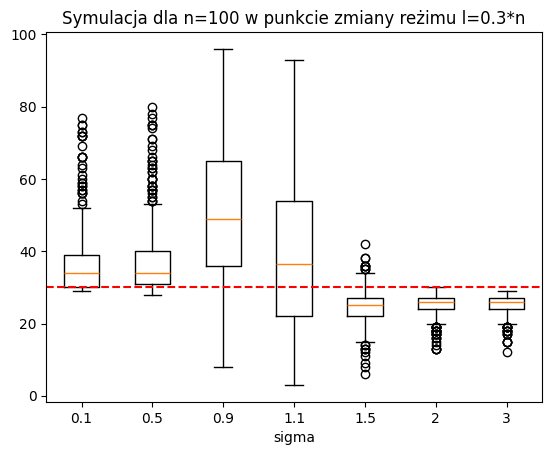

C:\Users\Maria Nowacka\AppData\Local\Temp\ipykernel_1196\2014523131.py:4: RuntimeWarning: invalid value encountered in scalar divide
  b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


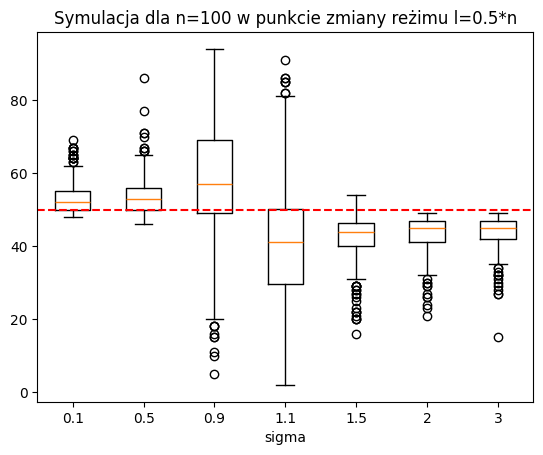

C:\Users\Maria Nowacka\AppData\Local\Temp\ipykernel_1196\2014523131.py:4: RuntimeWarning: invalid value encountered in scalar divide
  b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


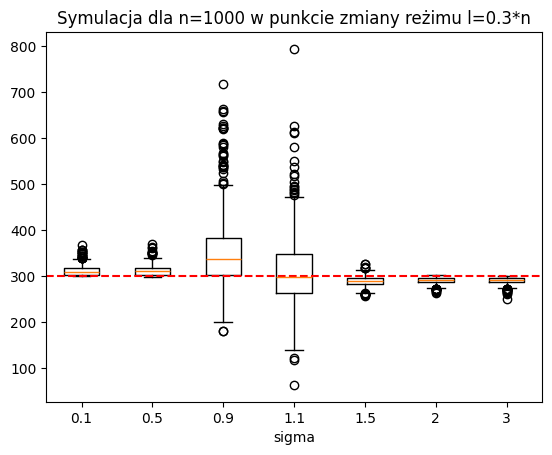

C:\Users\Maria Nowacka\AppData\Local\Temp\ipykernel_1196\2014523131.py:4: RuntimeWarning: invalid value encountered in scalar divide
  b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


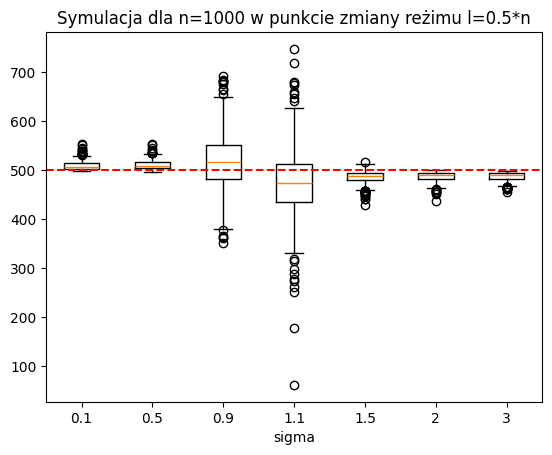

In [46]:
for n in [N1, N2]: 
    for l in [0.3, 0.5]:
        zadanie_5(n, l)
        